In [5]:
from h2_gym.algs import KalmanFilter
from h2_gym.envs import ShippingEnv
from pandas import DataFrame

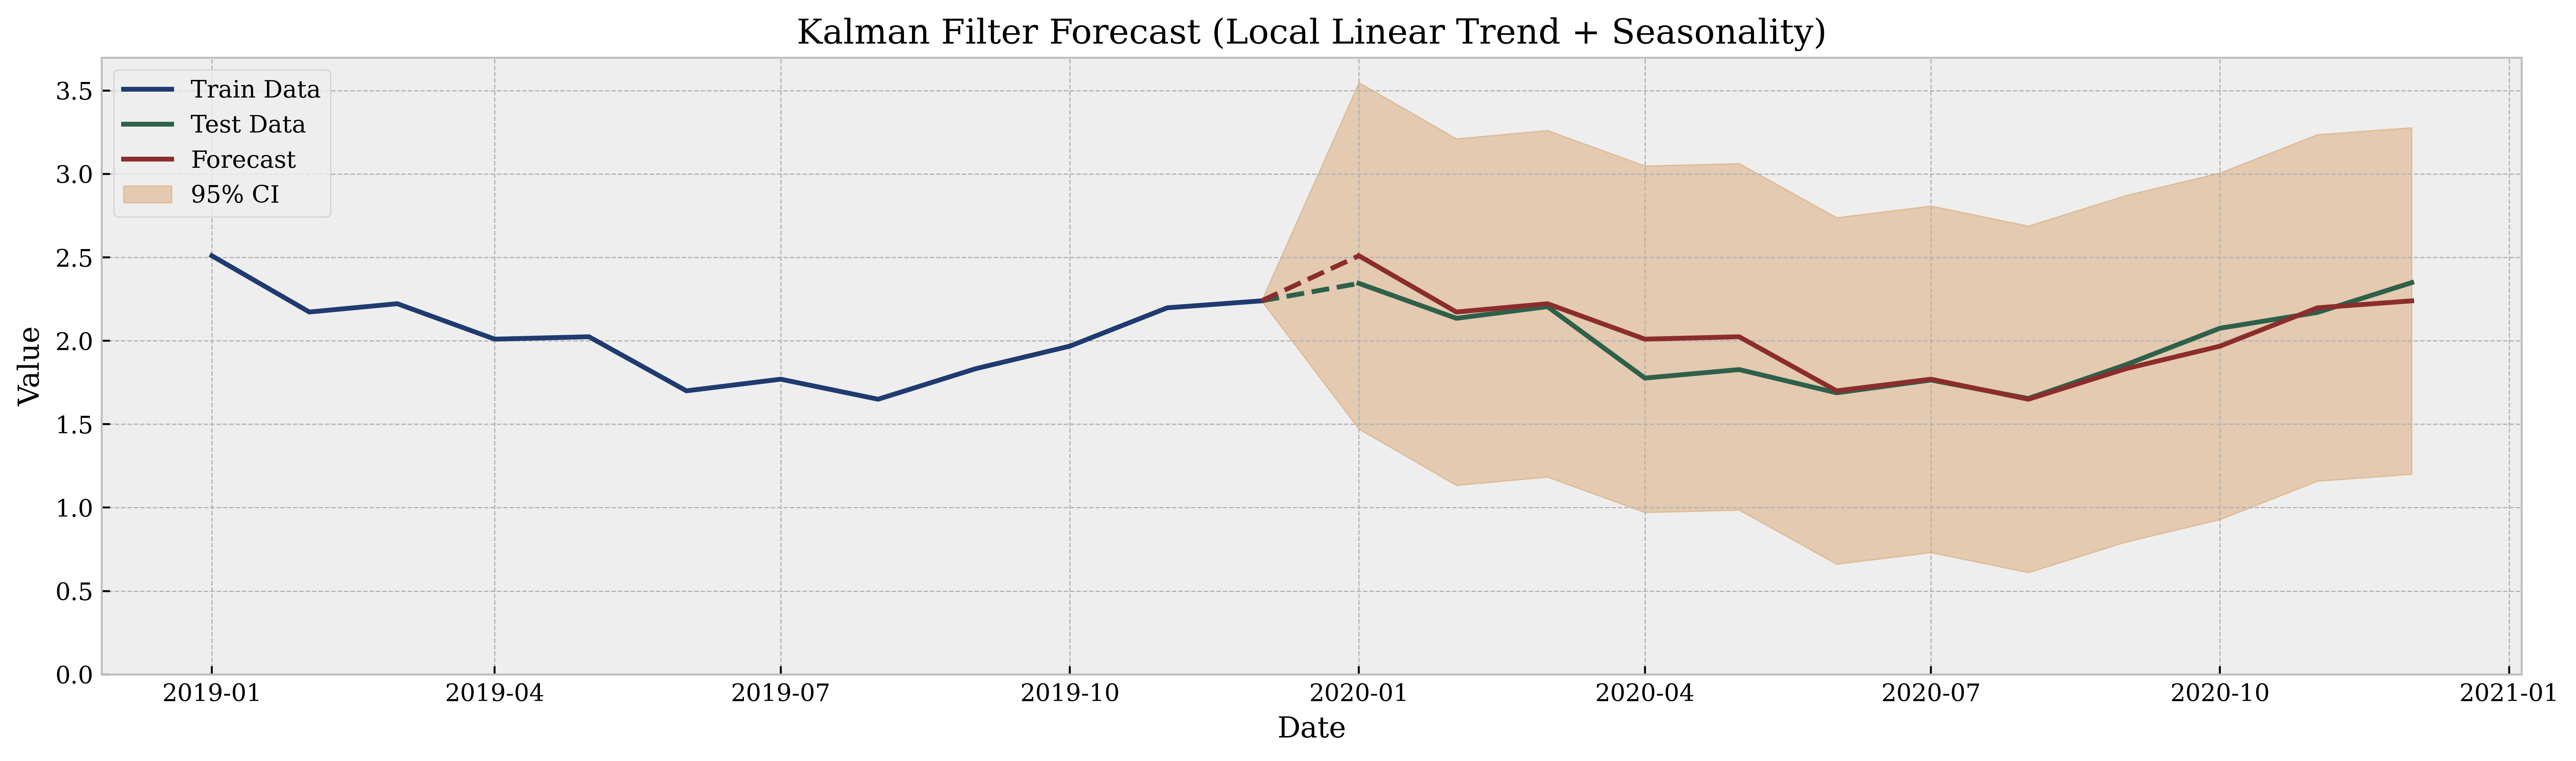

In [16]:
filter = KalmanFilter('EU','monthly','industry')
filter.scale_dataset(24.3)
filter.fit_train()
filter._test_data
filter.predict(12)
plt = filter.plot()

In [28]:
print(filter.predict(12).index[0].days_in_month)

31


[NOTE] Less than 12 month data left. Generating synthetic data


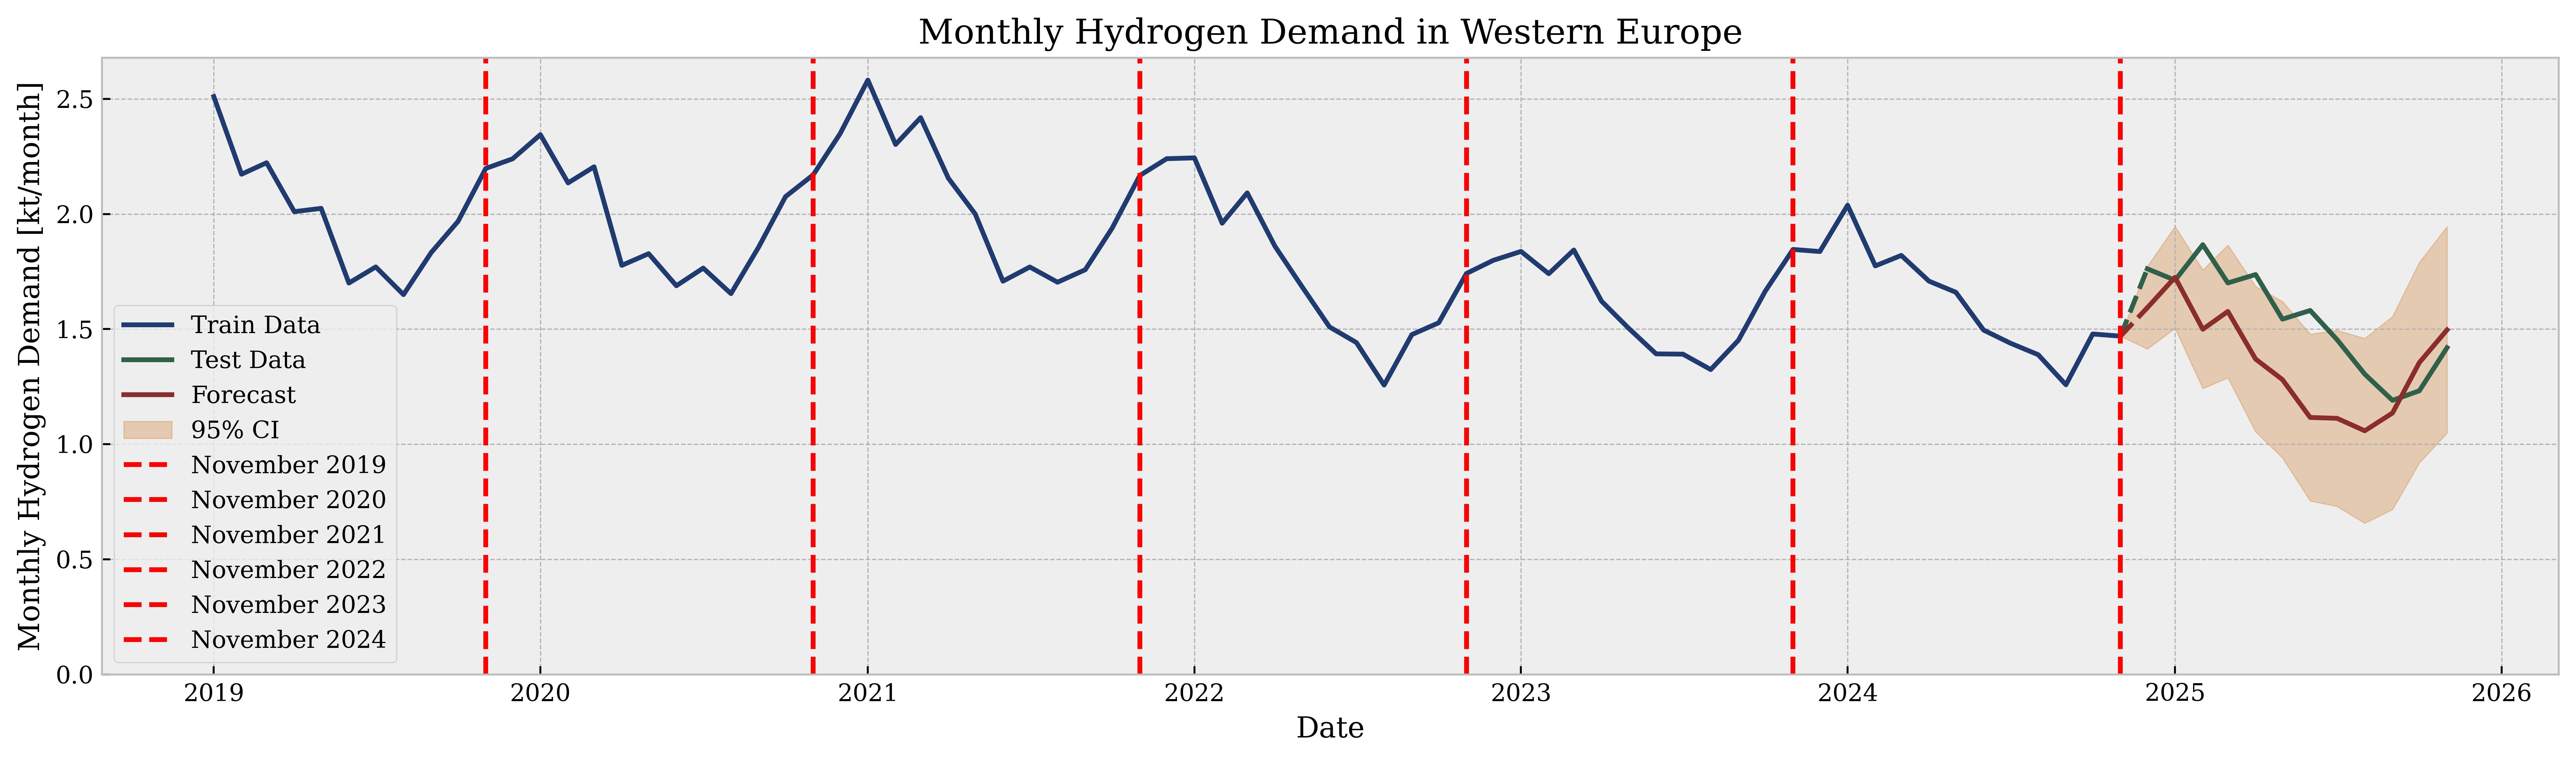

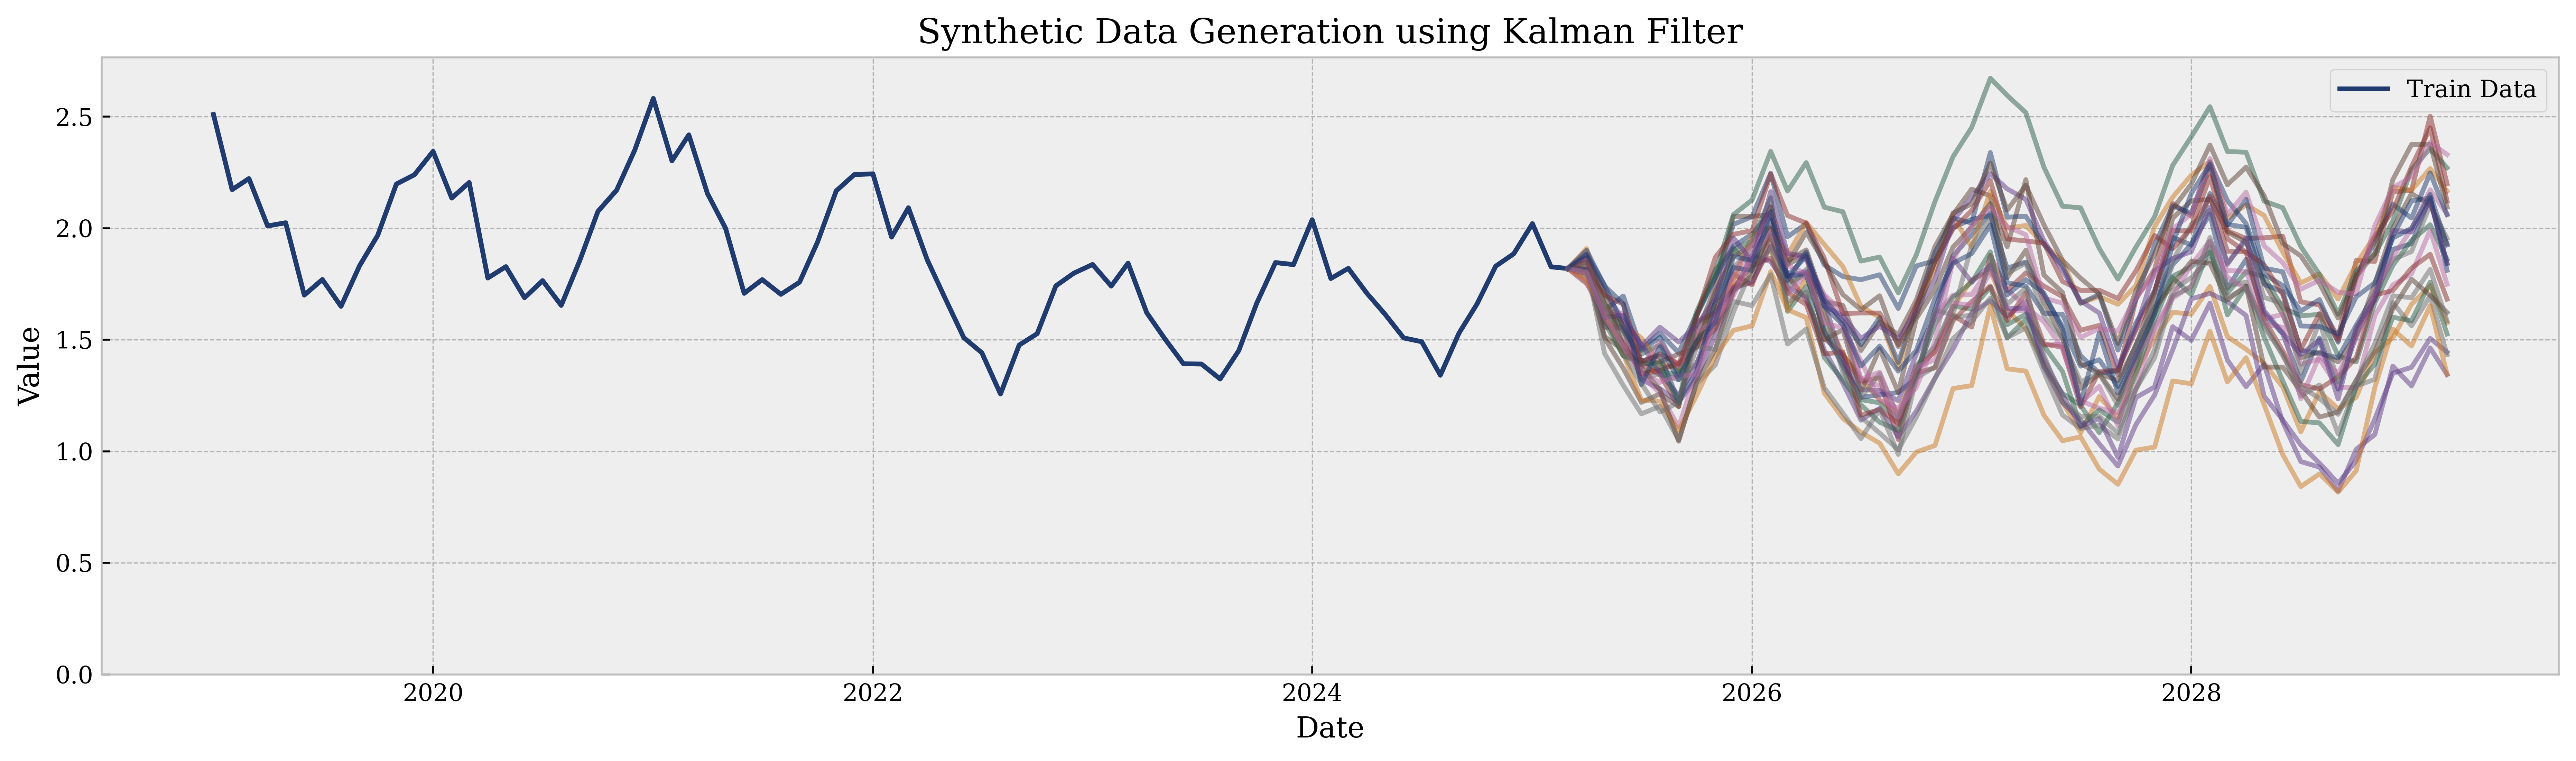

In [2]:
filter = KalmanFilter('EU','monthly','industry')
filter.scale_dataset(24.3)
filter.fit_train()
for i in range(1, 48+12):
    filter.update()
plt = filter.plot()
plt.ylabel('Monthly Hydrogen Demand [kt/month]')
plt.title('Monthly Hydrogen Demand in Western Europe')
import pandas as pd

for year in [2019, 2020, 2021,2022,2023,2024]:
    plt.axvline(x=pd.Timestamp(f'Nov-{year}'), color='red', linestyle='--', label=f'November {year}')
plt.legend()
plt.show()
sims = filter.gen_multi_synth(25,48)
_plt = filter.plot_synth(sims)
_plt.show()

In [3]:
environment = ShippingEnv()
with environment as env:
    env['vector'] = 'LH2'
    env['fast']['data_folder'] = "shipping_v1"
    env['fast']['planning_model'] = "LH2-Chile.yml"
    pass

In [4]:
environment._fast_data

{'sets': {'grid0': <pyomo.core.base.set.AbstractOrderedScalarSet at 0x10713e570>,
  'grid1': <pyomo.core.base.set.AbstractOrderedScalarSet at 0x1764c3300>},
 'params': {'electrolysis_efficiency': <pyomo.core.base.param.ScalarParam at 0x17d5bce50>,
  'electrolysis_compression_penalty': <pyomo.core.base.param.ScalarParam at 0x17f719490>,
  'production_compression_penalty': <pyomo.core.base.param.ScalarParam at 0x17f765990>,
  'storage_compression_penalty': <pyomo.core.base.param.ScalarParam at 0x17f765ad0>,
  'compression_efficiency': <pyomo.core.base.param.ScalarParam at 0x17f765c10>,
  'fuelcell_efficiency': <pyomo.core.base.param.ScalarParam at 0x17f765d50>,
  'variable_energy_penalty_conversion': <pyomo.core.base.param.ScalarParam at 0x17f765e90>,
  'calorific_value': <pyomo.core.base.param.ScalarParam at 0x17f765fd0>,
  'fixed_energy_penalty_conversion': <pyomo.core.base.param.ScalarParam at 0x17f766110>,
  'single_train_limit_conversion': <pyomo.core.base.param.ScalarParam at 0x17f